In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import warnings
from xgboost import plot_importance
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')

In [2]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)

In [3]:
train

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,USA,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,USA,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,USA,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,USA,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,USA,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,USA,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,USA,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,USA,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [5]:
train = train.drop(['index', 'country'],axis = 1)
train = train.drop(['Q25','Q26','Q8','Q23','Q9','Q13','Q22','Q21','Q7','Q10','Q17','Q16','Q20','ASD','TIPI1','VCL12','married','voted','hand','engnat','gender','urban','education','VCL16','VCL15','VCL14','VCL13','VCL11','TIPI4','VCL10','VCL8','VCL7','VCL6','VCL5','VCL4','VCL3','VCL2','VCL1','TIPI9','TIPI8','TIPI5'],axis=1)
test =test.drop(['index', 'country'],axis = 1)
test = test.drop(['Q25','Q26','Q8','Q23','Q9','Q13','Q22','Q21','Q7','Q10','Q17','Q16','Q20','ASD','TIPI1','VCL12','married','voted','hand','engnat','gender','urban','education','VCL16','VCL15','VCL14','VCL13','VCL11','TIPI4','VCL10','VCL8','VCL7','VCL6','VCL5','VCL4','VCL3','VCL2','VCL1','TIPI9','TIPI8','TIPI5'],axis=1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q11           14941 non-null  float64
 7   Q12           14933 non-null  float64
 8   Q14           14964 non-null  float64
 9   Q15           14955 non-null  float64
 10  Q18           14937 non-null  float64
 11  Q19           14947 non-null  float64
 12  Q24           14939 non-null  float64
 13  introelapse   15000 non-null  int64  
 14  testelapse    15000 non-null  int64  
 15  surveyelapse  15000 non-null  int64  
 16  TIPI2         14934 non-null  float64
 17  TIPI3         14921 non-null  float64
 18  TIPI6         14938 non-nu

In [7]:
train.isna().sum()

Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q11              59
Q12              67
Q14              36
Q15              45
Q18              63
Q19              53
Q24              61
introelapse       0
testelapse        0
surveyelapse      0
TIPI2            66
TIPI3            79
TIPI6            62
TIPI7            64
TIPI10           80
VCL9              0
age               0
religion        245
orientation     399
familysize      319
nerdiness         0
dtype: int64

Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q11              59
Q12              67
Q14              36
Q15              45
Q18              63
Q19              53
Q24              61
introelapse       0
testelapse        0
surveyelapse      0
TIPI2            66
TIPI3            79
TIPI6            62
TIPI7            64
TIPI10           80
VCL9              0
age               0
religion        245
orientation     399
familysize      319
nerdiness         0
dtype: int64

In [8]:
train_x = train.drop(['nerdiness'],axis=1)
train_y = train['nerdiness']

In [9]:
start_time=time.time()
xgb= xgb.XGBClassifier(
            n_estimators=1000,
        )
xgb.fit(X=train_x,y=train_y)
end_time=time.time()
print('소요 시간 : ')
print(end_time-start_time)

[00:05:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:05:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
소요 시간 : 
7.449972629547119
소요 시간 : 
7.449972629547119


In [10]:
# 재학습 위한 공간
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#lgbm_clf.fit(train_x, train_y)
lgbm_pred = xgb.predict(test)

In [12]:
submission = pd.read_csv('competition_data/sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

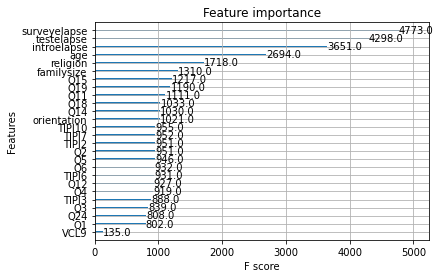

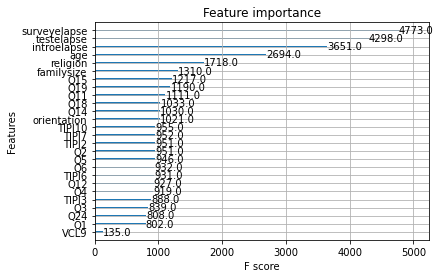

In [13]:
plot_importance(xgb,)

In [14]:
import eli5

In [15]:
from eli5.sklearn import PermutationImportance

In [16]:
X_val = train_x
y_val = train_y
perm = PermutationImportance(xgb, 
                             scoring = "accuracy",
                             n_iter=2,
                             random_state = 2).fit(X_val, y_val)

w = eli5.show_weights(perm, top = 80, feature_names = X_val.columns.tolist())
w
# 중요도가 마이너스인 특성을 제외해도 성능은 거의 영향이 없다.
# 좋은점은 모델 학습속도는 개선다는 점.


Weight,Feature
0.0438 ± 0.0019,surveyelapse
0.0368 ± 0.0016,testelapse
0.0348 ± 0.0024,Q6
0.0255 ± 0.0004,introelapse
0.0152 ± 0.0001,age
0.0129 ± 0.0002,Q1
0.0128 ± 0.0015,Q15
0.0064 ± 0.0002,religion
0.0046 ± 0.0006,TIPI7
0.0045 ± 0.0005,Q11


Weight,Feature
0.0438 ± 0.0019,surveyelapse
0.0368 ± 0.0016,testelapse
0.0348 ± 0.0024,Q6
0.0255 ± 0.0004,introelapse
0.0152 ± 0.0001,age
0.0129 ± 0.0002,Q1
0.0128 ± 0.0015,Q15
0.0064 ± 0.0002,religion
0.0046 ± 0.0006,TIPI7
0.0045 ± 0.0005,Q11


In [17]:
train_x2 = train_x.drop(['Q25','Q26','Q8','Q23','Q9','Q13','Q22','Q21','Q7','Q10','Q17','Q16','Q20','ASD','TIPI1','VCL12','married','voted','hand','engnat','gender','urban','education','VCL16','VCL15','VCL14','VCL13','VCL11','TIPI4','VCL10','VCL8','VCL7','VCL6','VCL5','VCL4','VCL3','VCL2','VCL1','TIPI9','TIPI8','TIPI5'],axis=1)
test_2 = test.drop(['Q25','Q26','Q8','Q23','Q9','Q13','Q22','Q21','Q7','Q10','Q17','Q16','Q20','ASD','TIPI1','VCL12','married','voted','hand','engnat','gender','urban','education','VCL16','VCL15','VCL14','VCL13','VCL11','TIPI4','VCL10','VCL8','VCL7','VCL6','VCL5','VCL4','VCL3','VCL2','VCL1','TIPI9','TIPI8','TIPI5'],axis=1)


KeyError: "['Q25' 'Q26' 'Q8' 'Q23' 'Q9' 'Q13' 'Q22' 'Q21' 'Q7' 'Q10' 'Q17' 'Q16'\n 'Q20' 'ASD' 'TIPI1' 'VCL12' 'married' 'voted' 'hand' 'engnat' 'gender'\n 'urban' 'education' 'VCL16' 'VCL15' 'VCL14' 'VCL13' 'VCL11' 'TIPI4'\n 'VCL10' 'VCL8' 'VCL7' 'VCL6' 'VCL5' 'VCL4' 'VCL3' 'VCL2' 'VCL1' 'TIPI9'\n 'TIPI8' 'TIPI5'] not found in axis"

KeyError: "['Q25' 'Q26' 'Q8' 'Q23' 'Q9' 'Q13' 'Q22' 'Q21' 'Q7' 'Q10' 'Q17' 'Q16'\n 'Q20' 'ASD' 'TIPI1' 'VCL12' 'married' 'voted' 'hand' 'engnat' 'gender'\n 'urban' 'education' 'VCL16' 'VCL15' 'VCL14' 'VCL13' 'VCL11' 'TIPI4'\n 'VCL10' 'VCL8' 'VCL7' 'VCL6' 'VCL5' 'VCL4' 'VCL3' 'VCL2' 'VCL1' 'TIPI9'\n 'TIPI8' 'TIPI5'] not found in axis"

In [ ]:
submission["nerdiness"] = lgbm_pred

In [ ]:
submission

In [ ]:
submission.to_csv("baseline_withNA-XGB-permu.csv", index = False)